
The pre-assignment for data science internship Done by Rabiul Islam. 25.01.2024

# Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Load The data

In [6]:
df = pd.read_csv('orders_autumn_2020.csv')
df


,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18701,2020-09-30 19:27:00.000,-1,1,60.170,24.946,60.170,24.945,24,23,0.0,12.8,2.34419,0.0
18702,2020-09-30 19:36:00.000,-8,6,60.185,24.944,60.178,24.949,23,15,0.0,12.8,2.34419,0.0
18703,2020-09-30 19:39:00.000,-14,3,60.186,24.949,60.188,24.956,25,11,0.0,12.8,2.34419,0.0
18704,2020-09-30 19:42:00.000,-11,3,60.172,24.929,60.168,24.930,21,10,0.0,12.8,2.34419,0.0


# Datasets exploration and Analyzing

In [7]:
print("Basic information about the DataFrame:")
print(df.info())

print("\nFirst few rows of the DataFrame:")
print(df.head())

print("\nSummary statistics of the DataFrame:")
print(df.describe())

Basic information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18706 entries, 0 to 18705
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TIMESTAMP                                             18706 non-null  object 
 1   ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES  18706 non-null  int64  
 2   ITEM_COUNT                                            18706 non-null  int64  
 3   USER_LAT                                              18706 non-null  float64
 4   USER_LONG                                             18706 non-null  float64
 5   VENUE_LAT                                             18706 non-null  float64
 6   VENUE_LONG                                            18706 non-null  float64
 7   ESTIMATED_DELIVERY_MINUTES                            18706 non-null  int64  
 8   ACTUAL_DELIVERY_M

In [6]:
import pandas as pd
df = pd.read_csv('orders_autumn_2020.csv')
df
%matplotlib inline
import matplotlib.pyplot as plt
orders_autumn_2020.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

NameError: name 'orders_autumn_2020' is not defined

# Identify Nan Values and visualization

In [8]:

# Check for NaN values in the entire dataset
nan_values = df.isna().sum()

# Check for NaN values in a specific column ITEM Count
nan_values_in_column = df['ITEM_COUNT'].isna().sum()

# Check if there are any NaN values in the entire dataset
if df.isna().any().any():
    print("There are NaN values in the dataset.")
else:
    print("There are no NaN values in the dataset.")



There are NaN values in the dataset.


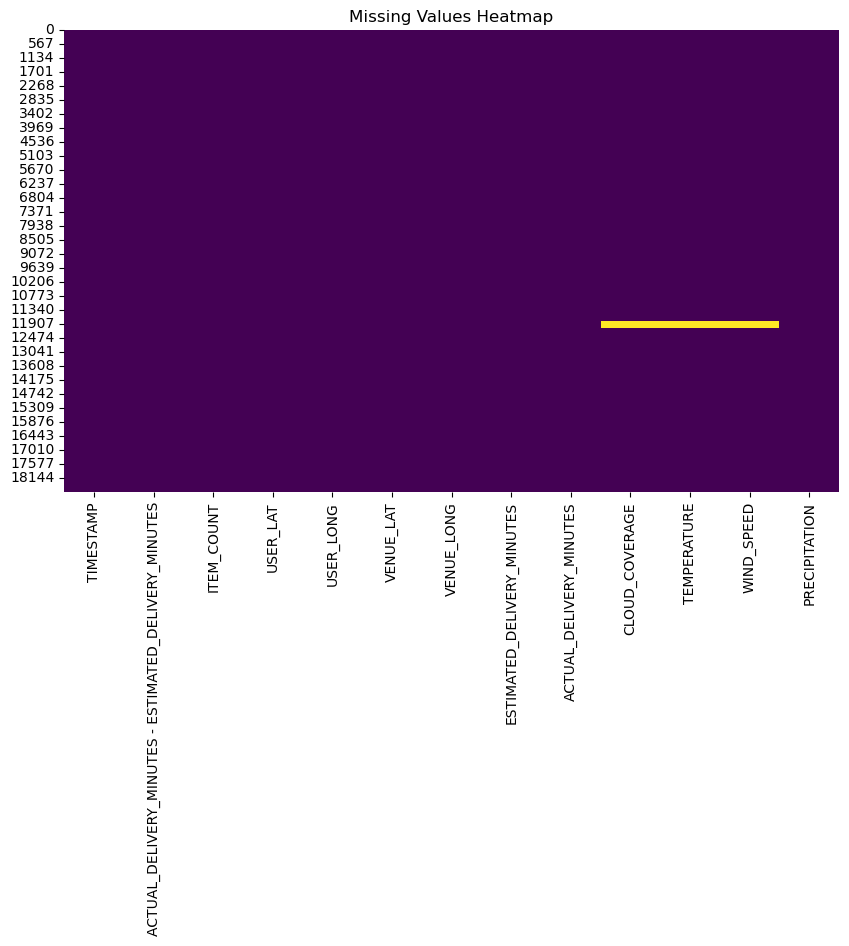

In [7]:

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


# Identify Missing, Duplicate values and visualization

In [10]:

missing_values = df.isnull().sum()

# Check if there are any missing values in the entire dataset
if missing_values.sum() > 0:
    print("There are missing values in the dataset.")
    print("Missing values by column:")
    print(missing_values)
else:
    print("There are no missing values in the dataset.")


There are missing values in the dataset.
Missing values by column:
TIMESTAMP                                                 0
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES      0
ITEM_COUNT                                                0
USER_LAT                                                  0
USER_LONG                                                 0
VENUE_LAT                                                 0
VENUE_LONG                                                0
ESTIMATED_DELIVERY_MINUTES                                0
ACTUAL_DELIVERY_MINUTES                                   0
CLOUD_COVERAGE                                          277
TEMPERATURE                                             277
WIND_SPEED                                              277
PRECIPITATION                                             0
dtype: int64


There are duplicate values in the following columns:
['TIMESTAMP', 'ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES', 'ITEM_COUNT', 'USER_LAT', 'USER_LONG', 'VENUE_LAT', 'VENUE_LONG', 'ESTIMATED_DELIVERY_MINUTES', 'ACTUAL_DELIVERY_MINUTES', 'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION']


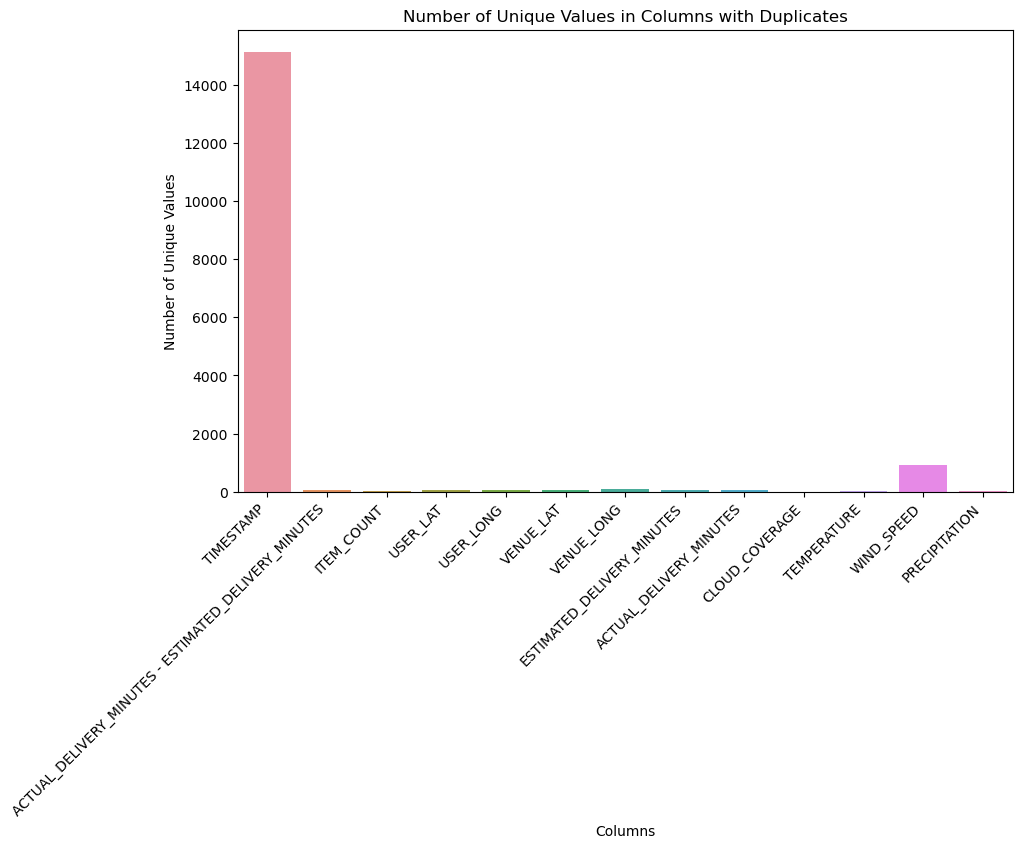

In [11]:


# Check for duplicate values in each column
duplicate_values_in_columns = df.apply(lambda x: x.duplicated().any())

# Filter columns with duplicate values
columns_with_duplicates = duplicate_values_in_columns[duplicate_values_in_columns].index.tolist()

if columns_with_duplicates:
    print("There are duplicate values in the following columns:")
    print(columns_with_duplicates)

    # Create a bar chart to visualize columns with duplicate values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=columns_with_duplicates, y=df[columns_with_duplicates].nunique())
    plt.title("Number of Unique Values in Columns with Duplicates")
    plt.xlabel("Columns")
    plt.ylabel("Number of Unique Values")
    plt.xticks(rotation=45, ha="right")
    plt.show()
else:
    print("There are no duplicate values in any column.")


# Order Frequency over Time 

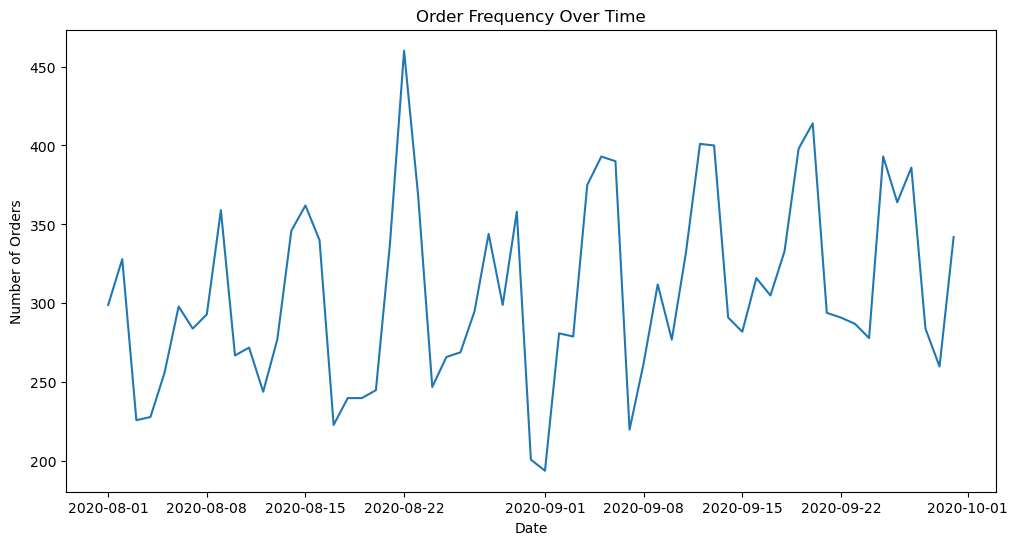

In [12]:

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.set_index('TIMESTAMP', inplace=True)

# Resample to daily frequency and count orders
daily_orders = df.resample('D').size()

# Plot order frequency over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_orders.index, y=daily_orders.values)
plt.title('Order Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()


# Distribution of delivery time

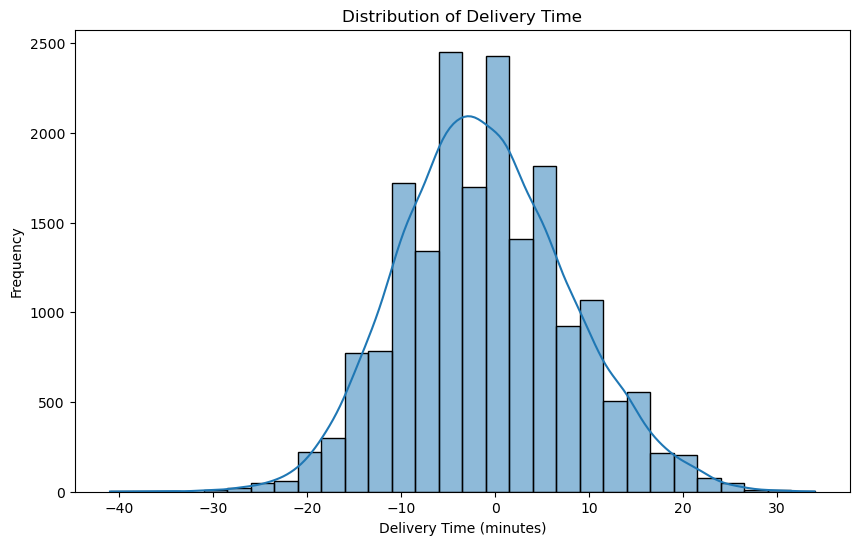

In [9]:

df['ACTUAL_DELIVERY_MINUTES'] = pd.to_numeric(df['ACTUAL_DELIVERY_MINUTES'], errors='coerce')
df['ESTIMATED_DELIVERY_MINUTES'] = pd.to_numeric(df['ESTIMATED_DELIVERY_MINUTES'], errors='coerce')

# Calculate delivery time
df['DELIVERY_TIME'] = df['ACTUAL_DELIVERY_MINUTES'] - df['ESTIMATED_DELIVERY_MINUTES']

# Plot 
plt.figure(figsize=(10, 6))
sns.histplot(df['DELIVERY_TIME'].dropna(), bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()



# Delivery Time vs Order Size

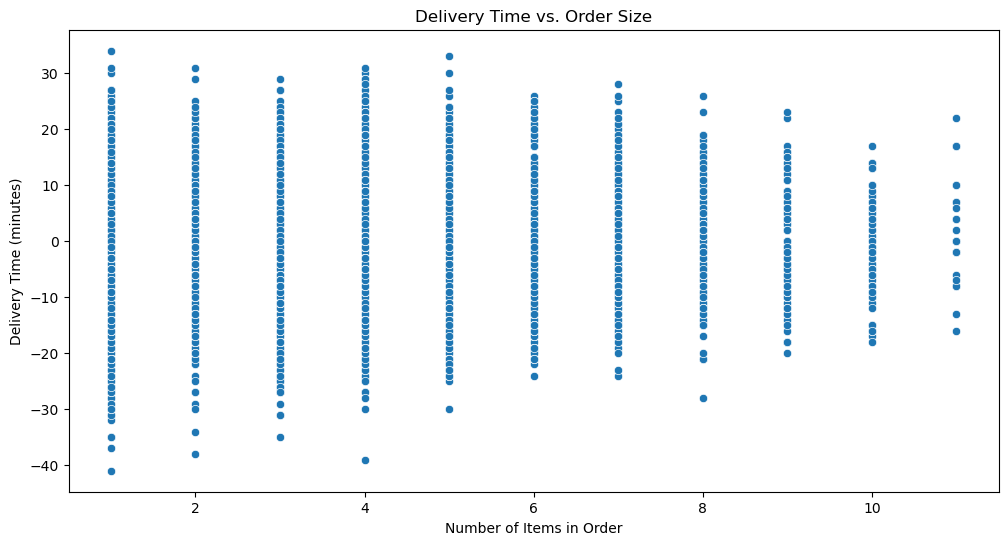

In [14]:
# 'ITEM_COUNT' and 'DELIVERY_TIME' columns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ITEM_COUNT', y='DELIVERY_TIME', data=df)
plt.title('Delivery Time vs. Order Size')
plt.xlabel('Number of Items in Order')
plt.ylabel('Delivery Time (minutes)')
plt.show()


# Geospatial Analysis of orders by Day of the week

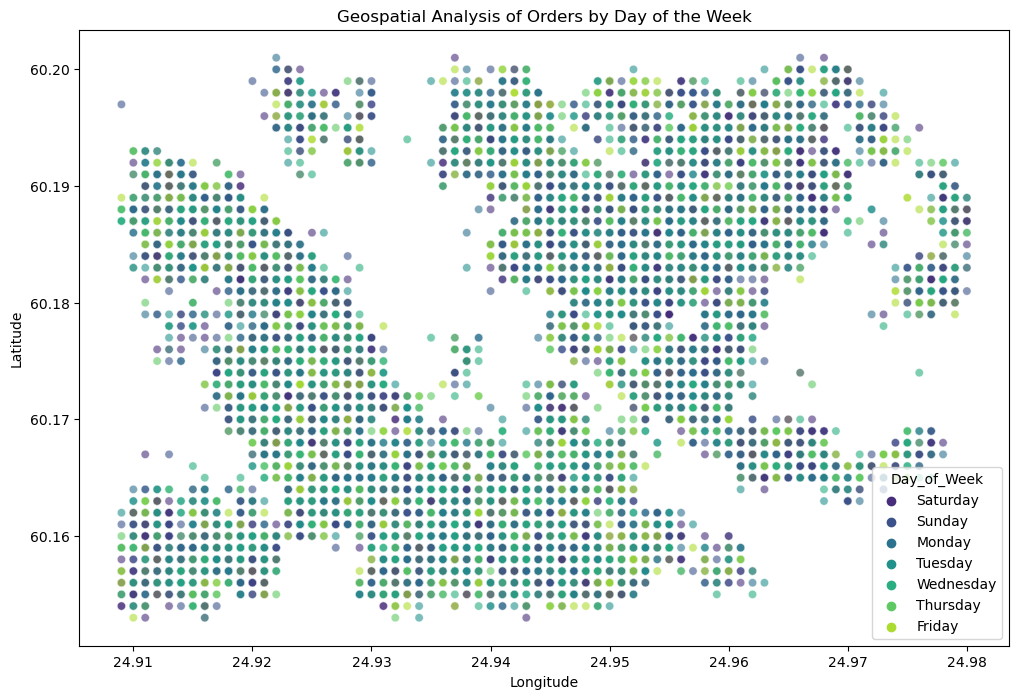

In [15]:

# Check if 'TIMESTAMP' is already the index
if 'TIMESTAMP' in df.index.names:
    df.reset_index(inplace=True)


df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.set_index('TIMESTAMP', inplace=True)

# Handle missing values
df['CLOUD_COVERAGE'].fillna(df['CLOUD_COVERAGE'].mean(), inplace=True)
df['TEMPERATURE'].fillna(df['TEMPERATURE'].mean(), inplace=True)
df['WIND_SPEED'].fillna(df['WIND_SPEED'].mean(), inplace=True)

# Create 'Day_of_Week' column
df['Day_of_Week'] = df.index.day_name()

# 'USER_LAT', 'USER_LONG' columns
plt.figure(figsize=(12, 8))
sns.scatterplot(x='USER_LONG', y='USER_LAT', data=df, hue='Day_of_Week', palette='viridis', alpha=0.6)
plt.title('Geospatial Analysis of Orders by Day of the Week')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



# Original Estimated Delivery Time data and Rolling Mean

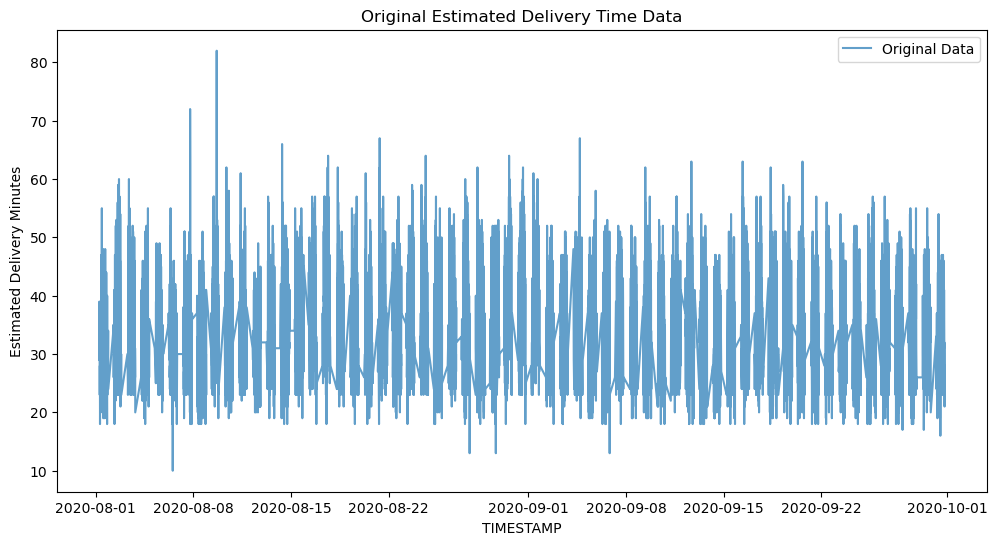

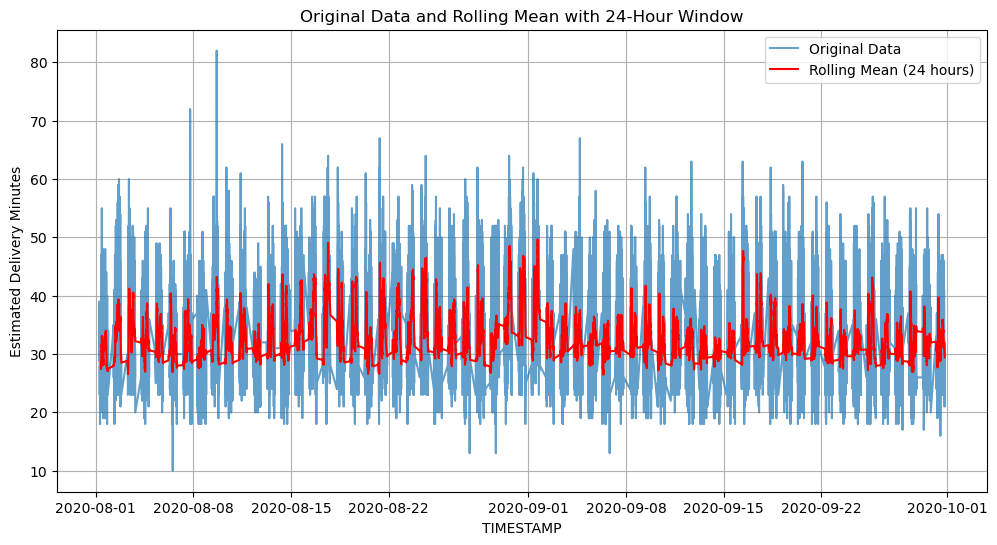

In [16]:

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df['ESTIMATED_DELIVERY_MINUTES'], label='Original Data', alpha=0.7)
plt.title('Original Estimated Delivery Time Data')
plt.xlabel('TIMESTAMP')
plt.ylabel('Estimated Delivery Minutes')
plt.legend()
plt.show()

# Calculate and plot the rolling mean
window_size = 24 
rolling_mean = df['ESTIMATED_DELIVERY_MINUTES'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['ESTIMATED_DELIVERY_MINUTES'], label='Original Data', alpha=0.7)
plt.plot(rolling_mean, label=f'Rolling Mean ({window_size} hours)', color='red')
plt.title(f'Original Data and Rolling Mean with {window_size}-Hour Window')
plt.xlabel('TIMESTAMP')
plt.ylabel('Estimated Delivery Minutes')
plt.legend()
plt.grid(True) 
plt.show()



# Seasonality

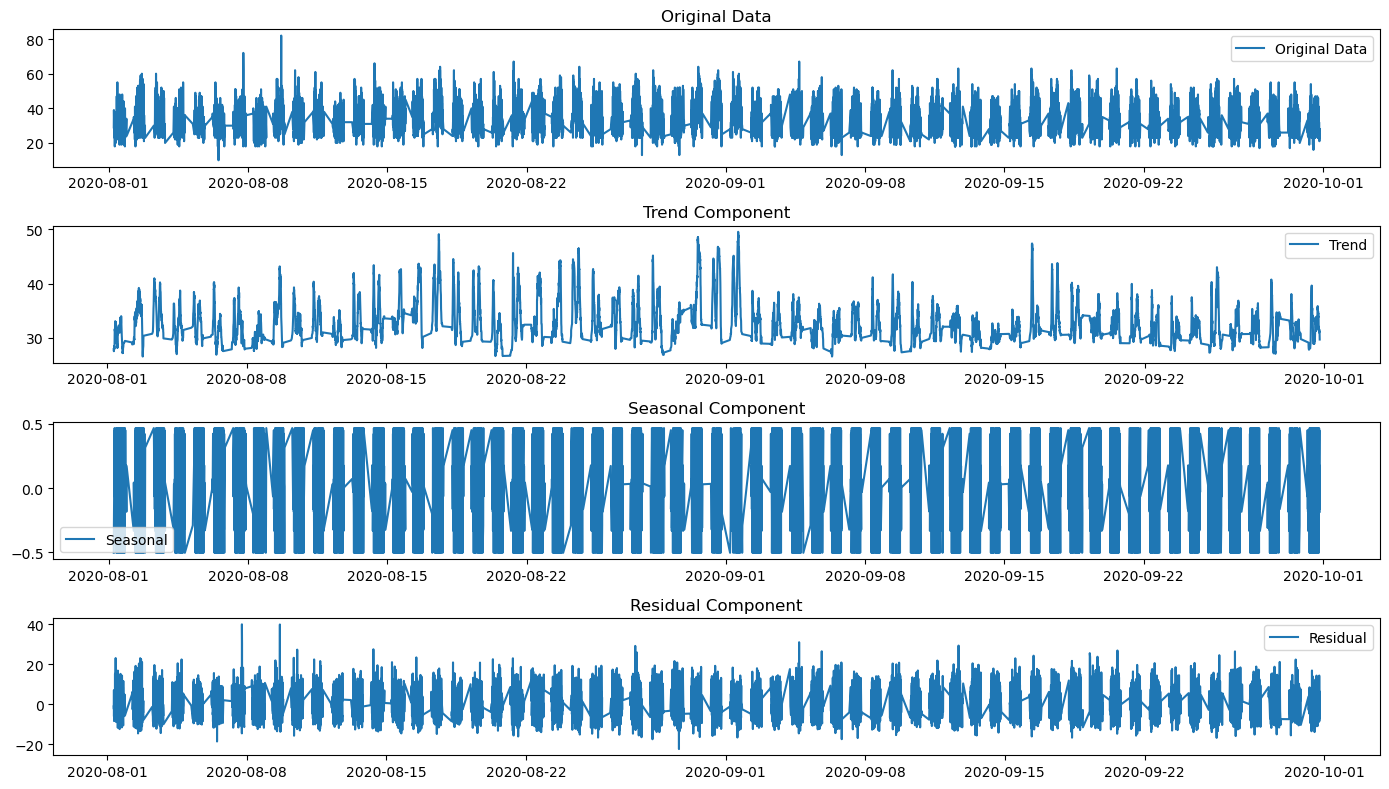

<Figure size 1200x400 with 0 Axes>

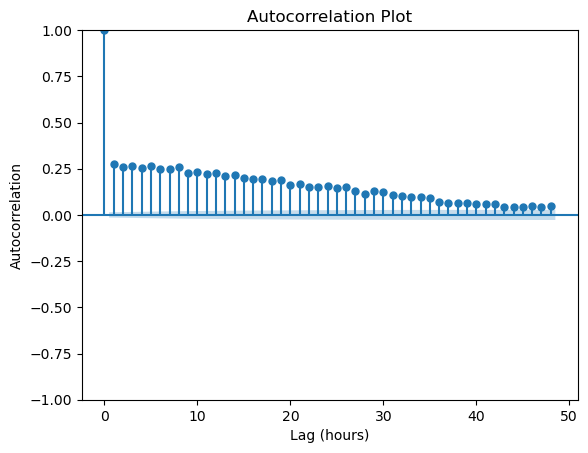

In [17]:

# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['ESTIMATED_DELIVERY_MINUTES'], model='additive', period=24)
# Plot the original time series
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(df['ESTIMATED_DELIVERY_MINUTES'], label='Original Data')
plt.title('Original Data')
plt.legend()

# Plot the trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')
plt.legend()

# Plot the seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

# Plot the residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

# Autocorrelation plot to visualize seasonality
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 4))
plot_acf(df['ESTIMATED_DELIVERY_MINUTES'], lags=48, alpha=0.05)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')
plt.show()


# Simple Linear Regression Model: predicted vs actual delivery Time

Mean Absolute Error: 5.019069619106365
Mean Squared Error: 40.8672142406891


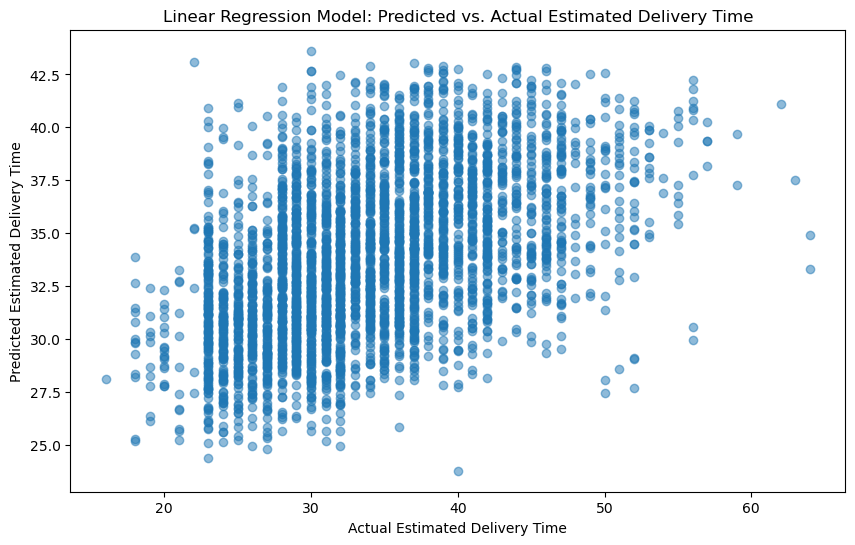

In [22]:



# Read the CSV file into a DataFrame
df = pd.read_csv('orders_autumn_2020.csv')

# Drop rows with missing values for simplicity
df = df.dropna()

# Select features and target variable
features = df[['ITEM_COUNT', 'USER_LAT', 'USER_LONG', 'VENUE_LAT', 'VENUE_LONG',
               'ACTUAL_DELIVERY_MINUTES', 'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION']]
target = df['ESTIMATED_DELIVERY_MINUTES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Linear Regression Model: Predicted vs. Actual Estimated Delivery Time')
plt.xlabel('Actual Estimated Delivery Time')
plt.ylabel('Predicted Estimated Delivery Time')
plt.show()


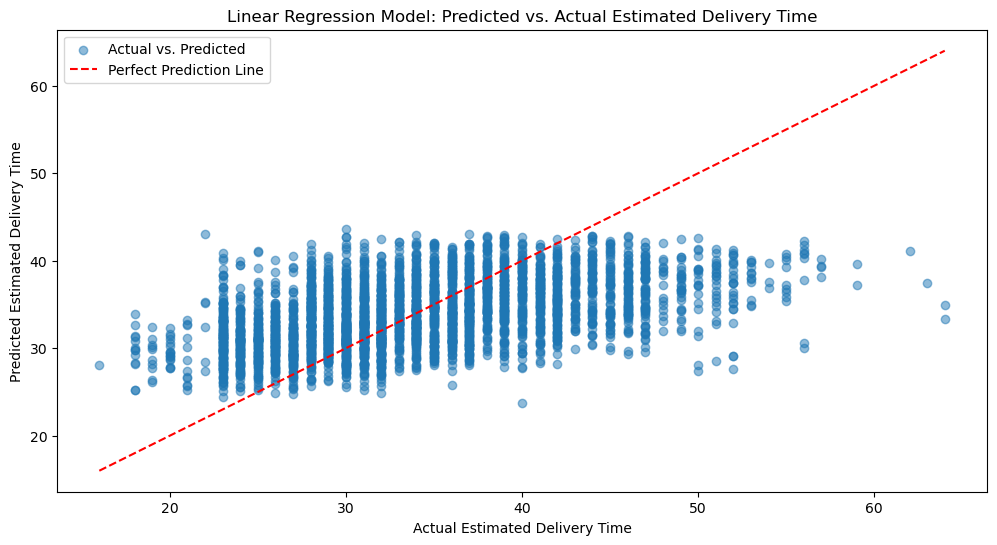

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction Line')
plt.title('Linear Regression Model: Predicted vs. Actual Estimated Delivery Time')
plt.xlabel('Actual Estimated Delivery Time')
plt.ylabel('Predicted Estimated Delivery Time')
plt.legend()
plt.show()


# Model 2 - Random Forest Regressor

Linear Regression - Mean Absolute Error: 5.019069619106365
Linear Regression - Mean Squared Error: 40.8672142406891
Random Forest - Mean Absolute Error: 4.632170374389582
Random Forest - Mean Squared Error: 35.54697352143244


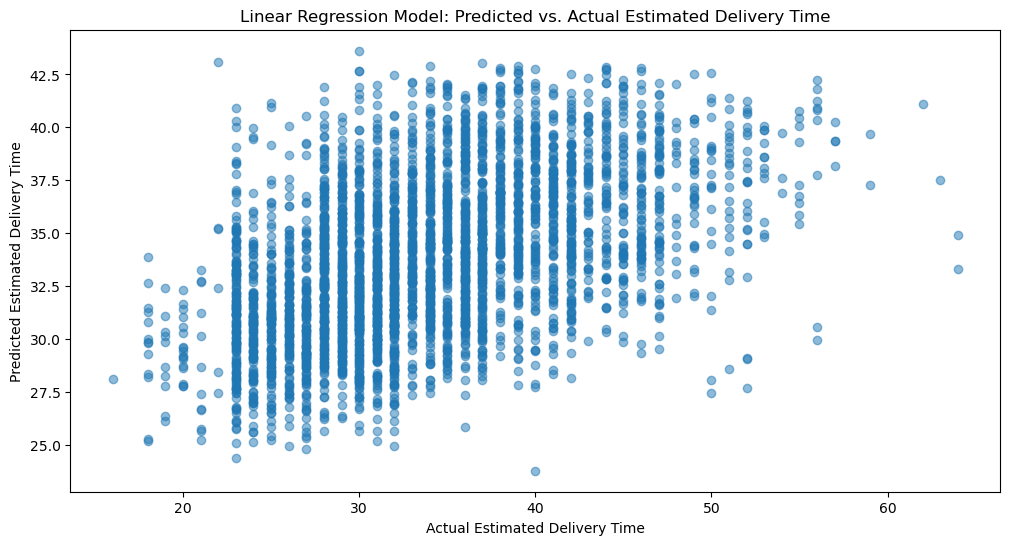

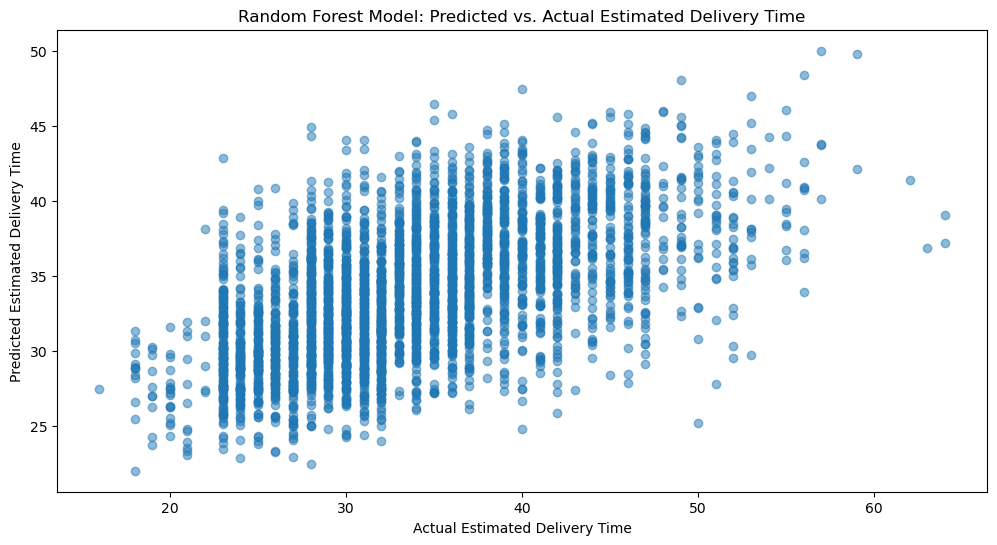

In [2]:

# Read the CSV file and preprocess data
df = pd.read_csv('orders_autumn_2020.csv')
df = df.dropna()

# Model 1 - Linear Regression
features_lr = df[['ITEM_COUNT', 'USER_LAT', 'USER_LONG', 'VENUE_LAT', 'VENUE_LONG',
                   'ACTUAL_DELIVERY_MINUTES', 'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION']]
target_lr = df['ESTIMATED_DELIVERY_MINUTES']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(features_lr, target_lr, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = model_lr.predict(X_test_lr)

mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)

# Model 2 - Random Forest Regressor
features_rf = df[['ITEM_COUNT', 'USER_LAT', 'USER_LONG', 'VENUE_LAT', 'VENUE_LONG',
                   'ACTUAL_DELIVERY_MINUTES', 'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION']]
target_rf = df['ESTIMATED_DELIVERY_MINUTES']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features_rf, target_rf, test_size=0.2, random_state=42)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = model_rf.predict(X_test_rf)

mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)

# Display results for both models
print(f'Linear Regression - Mean Absolute Error: {mae_lr}')
print(f'Linear Regression - Mean Squared Error: {mse_lr}')

print(f'Random Forest - Mean Absolute Error: {mae_rf}')
print(f'Random Forest - Mean Squared Error: {mse_rf}')

# Visualization for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(y_test_lr, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Predicted vs. Actual Estimated Delivery Time')
plt.xlabel('Actual Estimated Delivery Time')
plt.ylabel('Predicted Estimated Delivery Time')
plt.show()

# Visualization for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Predicted vs. Actual Estimated Delivery Time')
plt.xlabel('Actual Estimated Delivery Time')
plt.ylabel('Predicted Estimated Delivery Time')
plt.show()


In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction Line')
plt.title('Random Forest Model: Predicted vs. Actual Estimated Delivery Time')
plt.xlabel('Actual Estimated Delivery Time')
plt.ylabel('Predicted Estimated Delivery Time')
plt.legend()
plt.show()


NameError: name 'y_test' is not defined

<Figure size 1200x600 with 0 Axes>

# Thank you for your Time looking into it !